In [1]:
import hashlib

import pandas as pd
import numpy as np
import polars as pl
import time
from time import perf_counter

In [2]:
df_movies_pd = pd.read_csv('data/movies.csv')
df_movies_pl = pl.read_csv('data/movies.csv')

In [3]:
df_movies_pd.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies_pl.head()

movieId,title,genres
i64,str,str
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…"
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance"""
5,"""Father of the Bride Part II (1…","""Comedy"""


In [5]:
def measure_time(func):
    start = perf_counter()
    result = func()
    end = perf_counter()
    time = end - start
    return result, time


def time_comparising(pandas_time, polars_time):
    print(f"Pandas time: {pandas_time:.5f} s")
    print(f"Polars time: {polars_time:.5f} s")

    try:
        if pandas_time > polars_time:
            diff = abs(pandas_time - polars_time) / (polars_time) * 100
            print(f"Polars: {diff:.5f}% faster")
        elif polars_time > pandas_time:
            diff = abs(pandas_time - polars_time) / (pandas_time) * 100
            print(f"Pandas: {diff:.5f}% faster")
        else:
            print("Both libraries took the same amount of time!")
    except ZeroDivisionError:
        return float('inf')  # Return inf if both values are zero
    except TypeError:
        return float('inf')  # Return inf if either value is not a number

In [6]:
times_pd = []
times_pl = []

In [7]:
counter = 1
print(f"Analysis {counter}: Read CSV file")

start = perf_counter()
df_pd = pd.read_csv('data/ratings.csv')
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = pl.read_csv('data/ratings.csv', schema_overrides={"rating": pl.Float32})
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 1: Read CSV file
Pandas time: 0.22563 s
Polars time: 0.08776 s
Polars: 157.09531% faster


In [ ]:
df_pd.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [ ]:
df_pl.head()

userId,movieId,rating,timestamp
i64,i64,f32,i64
1,17,4.0,944249077
1,25,1.0,944250228
1,29,2.0,943230976
1,30,5.0,944249077
1,32,5.0,943228858


In [ ]:
print(f"Analysis {counter}: Merge df")

start = perf_counter()
df_pd = pd.merge(df_pd, df_movies_pd, on="movieId", how="left")
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.join(df_movies_pl, on="movieId", how="left")
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 2: Merge df
Pandas time: 4.91585 s
Polars time: 3.39917 s
Polars: 44.61933% faster


In [ ]:
df_pd

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...,...,...,...
18332925,114767,986,2.5,1240169501,Fly Away Home (1996),Adventure|Children
18332926,114767,1036,2.0,1240359298,Die Hard (1988),Action|Crime|Thriller
18332927,114767,1196,4.0,1240267122,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
18332928,114767,1210,4.0,1240267042,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi


In [ ]:
df_pl

userId,movieId,rating,timestamp,title,genres
i64,i64,f32,i64,str,str
1,17,4.0,944249077,"""Sense and Sensibility (1995)""","""Drama|Romance"""
1,25,1.0,944250228,"""Leaving Las Vegas (1995)""","""Drama|Romance"""
1,29,2.0,943230976,"""City of Lost Children, The (Ci…","""Adventure|Drama|Fantasy|Myster…"
1,30,5.0,944249077,"""Shanghai Triad (Yao a yao yao …","""Crime|Drama"""
1,32,5.0,943228858,"""Twelve Monkeys (a.k.a. 12 Monk…","""Mystery|Sci-Fi|Thriller"""
…,…,…,…,…,…
114767,986,2.5,1240169501,"""Fly Away Home (1996)""","""Adventure|Children"""
114767,1036,2.0,1240359298,"""Die Hard (1988)""","""Action|Crime|Thriller"""
114767,1196,4.0,1240267122,"""Star Wars: Episode V - The Emp…","""Action|Adventure|Sci-Fi"""


In [ ]:
print(f"Analysis {counter}: Head of Dataframe")

start = perf_counter()
print(df_pd.head())
end = perf_counter()
pd_tm = end - start

start = perf_counter()
print(df_pl.head())
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 3: Head of Dataframe
   userId  movieId  rating  timestamp  \
0       1       17     4.0  944249077   
1       1       25     1.0  944250228   
2       1       29     2.0  943230976   
3       1       30     5.0  944249077   
4       1       32     5.0  943228858   

                                               title  \
0                       Sense and Sensibility (1995)   
1                           Leaving Las Vegas (1995)   
2  City of Lost Children, The (Cité des enfants p...   
3  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
4          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                                   genres  
0                           Drama|Romance  
1                           Drama|Romance  
2  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
3                             Crime|Drama  
4                 Mystery|Sci-Fi|Thriller  
shape: (5, 6)
┌────────┬─────────┬────────┬───────────┬─────────────────────────────┬────────────────────────────┐
│ userI

In [ ]:
print(f"Analysis {counter}: Tail of Dataframe")

start = perf_counter()
print(df_pd.tail())
end = perf_counter()
pd_tm = end - start

start = perf_counter()
print(df_pl.tail())
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 4: Tail of Dataframe
          userId  movieId  rating   timestamp  \
18332925  114767      986     2.5  1240169501   
18332926  114767     1036     2.0  1240359298   
18332927  114767     1196     4.0  1240267122   
18332928  114767     1210     4.0  1240267042   
18332929  114767     1265     3.5          12   

                                                      title  \
18332925                               Fly Away Home (1996)   
18332926                                    Die Hard (1988)   
18332927  Star Wars: Episode V - The Empire Strikes Back...   
18332928  Star Wars: Episode VI - Return of the Jedi (1983)   
18332929                               Groundhog Day (1993)   

                           genres  
18332925       Adventure|Children  
18332926    Action|Crime|Thriller  
18332927  Action|Adventure|Sci-Fi  
18332928  Action|Adventure|Sci-Fi  
18332929   Comedy|Fantasy|Romance  
shape: (5, 6)
┌────────┬─────────┬────────┬────────────┬────────────────────────

In [ ]:
print(f"Analysis {counter}: Mean of Rating Column")

start = perf_counter()
df_pd['mean'] = df_pd['rating'].mean()
start = perf_counter()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns(pl.col('rating').mean().alias('mean'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 5: Mean of Rating Column
Pandas time: 0.00009 s
Polars time: 0.01148 s
Pandas: 12708.06465% faster


In [ ]:
print(f"Analysis {counter}: Standard Deviation of Rating Column")

start = perf_counter()
df_pd['std'] = df_pd['rating'].std()
start = perf_counter()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns(pl.col('rating').std().alias('std'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 6: Standard Deviation of Rating Column
Pandas time: 0.00003 s
Polars time: 0.14355 s
Pandas: 413958.72812% faster


In [ ]:
# Analysis: Groupby and mean
print(f"Analysis {counter}: Groupby and Mean")

start = perf_counter()
pandas_result = df_pd.groupby('userId')['rating'].mean()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.group_by('userId').agg(pl.col('rating').mean())
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 7: Groupby and Mean
Pandas time: 0.50712 s
Polars time: 1.33915 s
Pandas: 164.06764% faster


In [ ]:
pandas_result

,rating
userId,
1,3.531915
2,4.269231
3,3.588435
4,2.629630
5,3.272727
...,...
114763,3.859740
114764,3.487179
114765,3.962963


In [ ]:
# Value Counts
print(f"\nAnalysis {counter}: Value Counts")

start = perf_counter()
pandas_result = df_pd['rating'].value_counts()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl['rating'].value_counts()
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1


Analysis 8: Value Counts
Pandas time: 0.25292 s
Polars time: 0.39492 s
Pandas: 56.14390% faster


In [ ]:
# Filtering and counting
print(f"\nAnalysis {counter}: Filtering and Counting")

start = perf_counter()
pandas_result = df_pd[df_pd['rating'] > 3].shape[0]
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.filter(pl.col("rating") > 3).shape[0]
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1


Analysis 9: Filtering and Counting
Pandas time: 1.06549 s
Polars time: 1.93856 s
Pandas: 81.94073% faster


In [ ]:
# Sorting
print(f"Analysis {counter}: Sorting")

# Pandas Sorting
start = perf_counter()
pandas_result = df_pd.sort_values(by='rating', ascending=False)
end = perf_counter()
pd_tm = end - start

# Polars Sorting
start = perf_counter()
polars_result = df_pl.sort('rating', descending=True)
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 10: Sorting
Pandas time: 5.38737 s
Polars time: 5.82922 s
Pandas: 8.20161% faster


In [ ]:
# Window Functions
print(f"Analysis {counter}: Window Functions")

start = perf_counter()
df_pd['cumulative_sum'] = df_pd.groupby('userId')['rating'].cumsum()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns(pl.col('rating').cum_sum().over('userId').alias('cumulative_sum'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 11: Window Functions
Pandas time: 0.71680 s
Polars time: 1.33401 s
Pandas: 86.10647% faster


In [ ]:
# Criação de Novas Colunas (Expressões)
print(f"Analysis {counter}: Column Creation")

start = perf_counter()
df_pd['new_column'] = df_pd['rating'] * 2 + df_pd['userId']
end = perf_counter()
pd_tm = end - start

start = perf_counter()
df_pl = df_pl.with_columns((pl.col('rating') * 2 + pl.col('userId')).alias('new_column'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 12: Column Creation
Pandas time: 0.34080 s
Polars time: 1.26847 s
Pandas: 272.20111% faster


In [ ]:
# Redução em Várias Colunas
print(f"Analysis {counter}: Column Reduction")

start = perf_counter()
pandas_result = df_pd[['rating', 'userId']].sum(axis=1)
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.select((pl.col('rating') + pl.col('userId')).alias('sum_cols'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 13: Column Reduction
Pandas time: 2.99319 s
Polars time: 0.17613 s
Polars: 1599.43576% faster


In [ ]:
# Operações Matemáticas em Lote
print(f"Analysis {counter}: Batch Mathematical Operations")

start = perf_counter()
pandas_result = df_pd['userId'].apply(lambda x: x ** 2 + 3 * x + 2)
end = perf_counter()
pd_tm = end - start

start = perf_counter()
polars_result = df_pl.with_columns((pl.col('userId') ** 2 + 3 * pl.col('userId') + 2).alias('new_col'))
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 14: Batch Mathematical Operations
Pandas time: 20.15707 s
Polars time: 0.34879 s
Polars: 5679.12151% faster


In [ ]:
def pandas_operations():
    # Filtrar ratings acima de 4 e ordenar
    filtered = df_pd[df_pd["rating"] > 4].sort_values("timestamp")

    # Groupby para calcular a média de rating por item
    group = filtered.groupby("movieId")["rating"].mean().reset_index()

    # Adicionar uma nova coluna calculando um z-score (operação custosa)
    df_pd["z_score"] = (df_pd["rating"] - df_pd["rating"].mean()) / df_pd["rating"].std()

    # Filtrar novamente para itens com mais de 500 avaliações
    final = filtered.groupby("movieId").filter(lambda x: len(x) > 500)
    return final

def polars_operations():
    # Filtrar ratings acima de 4 e ordenar
    filtered = df_pl.filter(pl.col("rating") > 4).sort("timestamp")

    # Groupby para calcular a média de rating por item
    group = filtered.group_by("movieId").agg(pl.col("rating").mean())

    # Adicionar uma nova coluna calculando um z-score (operação custosa)
    df_polars = df_pl.with_columns(
        ((pl.col("rating") - pl.col("rating").mean()) / pl.col("rating").std()).alias("z_score")
    )

    # Contar o número de avaliações por item
    counts = filtered.group_by("movieId").agg(pl.count("userId").alias("num_ratings"))

    # Filtrar os itens com mais de 500 avaliações
    filtered_counts = counts.filter(pl.col("num_ratings") > 500)

    # Combinar com os dados filtrados originais
    final = filtered.join(filtered_counts, on="movieId", how="inner")
    return final

In [ ]:
# Operação Custosa
print(f"Analysis {counter}: Filter, Group, create column, filter again")

start = perf_counter()
_ = pandas_operations()
end = perf_counter()
pd_tm = end - start

start = perf_counter()
_ = polars_operations()
end = perf_counter()
pl_tm = end - start

times_pd.append(pd_tm)
times_pl.append(pl_tm)
time_comparising(pd_tm, pl_tm)
counter += 1

Analysis 15: Filter, Group, create column, filter again
Pandas time: 7.52484 s
Polars time: 2.08814 s
Polars: 260.36063% faster


In [ ]:
# Winner: Counter
def winner_counter(times_pd, times_pl):
    counter_pd = 0
    counter_pl = 0

    for i in range(len(times_pd)):
        if times_pd[i] > times_pl[i]:
            counter_pd += 1
        elif times_pd[i] < times_pl[i]:
            counter_pl += 1

    if counter_pd > counter_pl:
        winner = "Pandas"
    elif counter_pd < counter_pl:
        winner = "Polars"
    else:
        winner = "Draw"
    return winner, counter_pd, counter_pl

In [ ]:
time_comparising(np.mean(times_pd), np.mean(times_pl))

Pandas time: 4.42308 s
Polars time: 1.43481 s
Polars: 208.26962% faster


In [ ]:
winner, counter_pd, counter_pl = winner_counter(times_pd, times_pl)
print(f"Winner: {winner}")
print(f"Counter Pandas: {counter_pd}")
print(f"Counter Polars: {counter_pl}")

Winner: Polars
Counter Pandas: 7
Counter Polars: 8


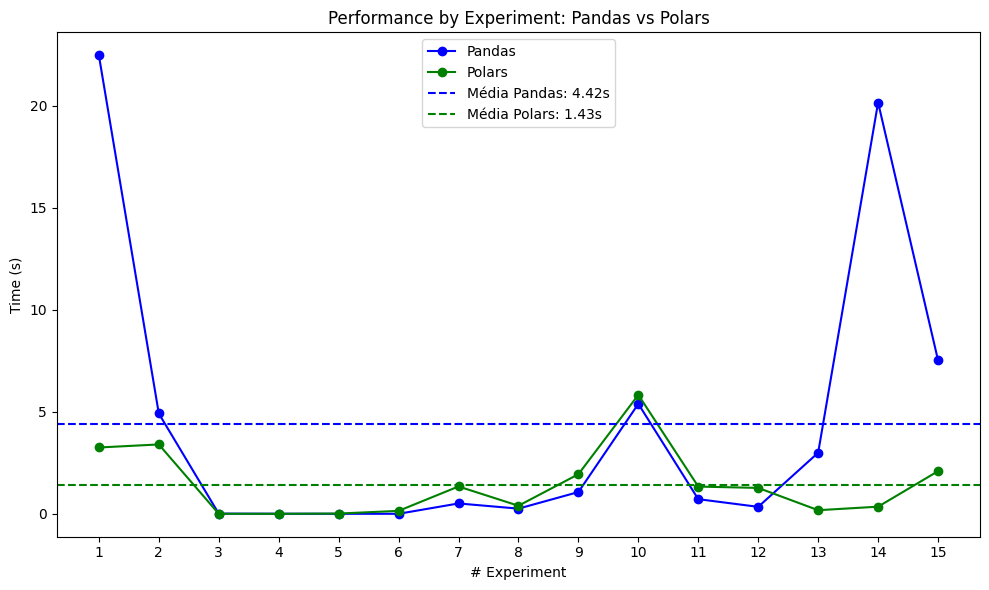

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the averages
mean_pd = np.mean(times_pd)
mean_pl = np.mean(times_pl)

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting the execution times for Pandas and Polars
plt.plot(range(1, len(times_pd) + 1), times_pd, 'o-', label='Pandas', color='blue')
plt.plot(range(1, len(times_pl) + 1), times_pl, 'o-', label='Polars', color='green')

# Adding the horizontal lines for the averages
plt.axhline(y=mean_pd, color='blue', linestyle='--', label=f'Média Pandas: {mean_pd:.2f}s')
plt.axhline(y=mean_pl, color='green', linestyle='--', label=f'Média Polars: {mean_pl:.2f}s')

# Configuring the plotplt.title('Desempenho de Tempo por Experimento: Pandas vs Polars')
plt.title('Performance by Experiment: Pandas vs Polars')
plt.xlabel('# Experiment')
plt.ylabel('Time (s)')
plt.legend()

# Setting x-ticks to display all experiment numbers
plt.xticks(range(1, len(times_pd) + 1))  # Adjusting x-axis ticks to show all experiment numbers

# Displaying the plot
plt.tight_layout()
plt.show()